# Convert a network from momepy

Convert a network from `momepy` to a `cityseer` compatible `networkx` graph.

The process is for converting `momepy` networks is similar to that for opening street network datasets via `geopandas`.


In [2]:
import geopandas as gpd
import momepy
from cityseer.tools import io, plot


/Users/gareth/dev/cityseer-examples/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Prepare a `momepy` street network. Here we will use the `momepy` example dataset `streets` which is a `GeoDataFrame` of street segments.


In [ ]:
streets_gpd = gpd.read_file(
    momepy.datasets.get_path("bubenec"),
    layer="streets",
)
streets_gpd.head()

,geometry
0,"LINESTRING (1603585.64 6464428.774, 1603413.20..."
1,"LINESTRING (1603268.502 6464060.781, 1603296.8..."
2,"LINESTRING (1603607.303 6464181.853, 1603592.8..."
3,"LINESTRING (1603678.97 6464477.215, 1603675.68..."
4,"LINESTRING (1603537.194 6464558.112, 1603557.6..."


<Axes: >

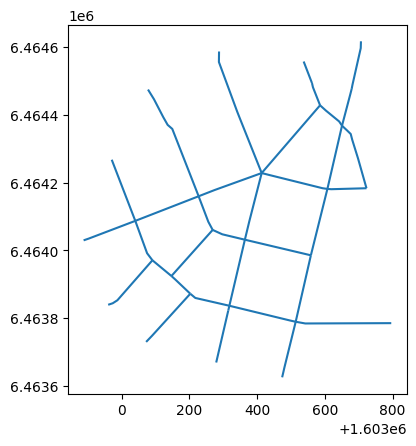

In [4]:
streets_gpd.plot()

Use the [`nx_from_generic_geopandas`](https://cityseer.benchmarkurbanism.com/tools/io#nx-from-generic-geopandas) function to convert the `geopandas` LineStrings dataset to a `networkx` graph. This function will automatically create nodes and edges from the LineStrings in the dataset.


INFO:cityseer.tools.graphs:Merging parallel edges within buffer of 1.
INFO:cityseer.tools.plot:Preparing graph nodes
INFO:cityseer.tools.plot:Preparing graph edges


MultiGraph with 29 nodes and 35 edges


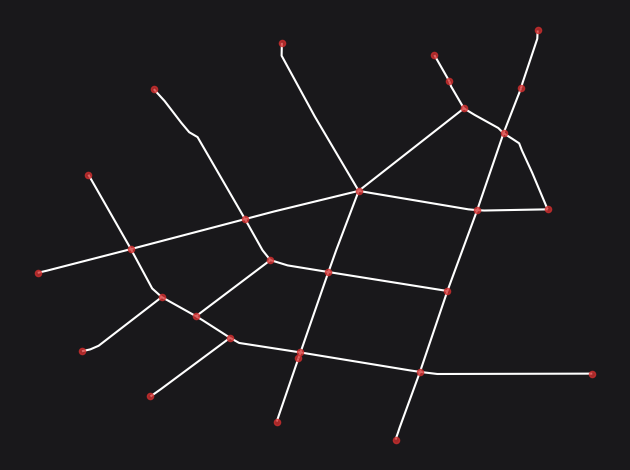

In [5]:
G = io.nx_from_generic_geopandas(streets_gpd)
print(G)
plot.plot_nx(G, plot_geoms=True)